# Internal Factors Influencing Student Performances by Farid Jamshid, 100925863
### _Understanding Student Performance and Influencing Internal Factors_

## Introduction
Student performance on exams is often attributed to factors such as parental involvement, accessibility to resources, and genetic factors that play a role in educational attainment. Such factors are all many times outside of our control, which to most can be extremely frustrating, as many opportunities can be squandered due to bad academic performances on exams. When only centering one's thoughts on these external factors many can find themselves at a loss of motivation, as they believe that all academic performances, but for this case specifically exams, are fully attributed to external factors.

In this assignment however, I will explore the many internal factors, meaning factors that are in our control, that contribute to students's own success on their exams. For this assignment, the dataset used was made available through a csv file sourced from [Kaggle](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download). This assignment will explore the effects various internal factors have on student exam performances and prove that one's examinational success can be improved through various means. The internal factors examined will include, attendance, hours studied, participation in extracurricular activities, average hours of sleep per night, and students's motivation levels. 


![Education](https://www.ouac.on.ca/wp-content/uploads/2023/03/group_teacher_pointing_at_student_istock-scaled.jpg)
##### *Image source: https://www.ouac.on.ca/guide/teas-guide/*

## Methods
### Data Collection
Through the use of a [Github repository](https://raw.githubusercontent.com/AbdulMus/lifeEx/refs/heads/main/StudentPerformanceFactors.csv) including a dataset sourced from Kaggle, the dataset is stored inside the variable "factors".

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [100]:
# Load data
factors = pd.read_csv('StudentPerformanceFactors.csv')

# Display the dataset
factors

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Data Cleaning

The original dataset had inappropriate characters used throughout its column names and unneeded columns that included external factors to students's grades. The factors dataset was resolved of those issues here.

In [101]:
# Replace all underscores within column headers with spaces
factors.columns = factors.columns.str.replace('_', ' ')

# Drop all external factors
factors = factors.drop(columns=["Parental Involvement", "Access to Resources", "Previous Scores", "Internet Access", "Tutoring Sessions", "Teacher Quality", "School Type", "Peer Influence", "Learning Disabilities", "Parental Education Level", "Distance from Home", "Gender", "Family Income", "Physical Activity"])

In the event that the dataset had any missing values, rows with missing values would be removed before any type of analysis was performed. The current dataset didn't have any missing values, so further action was not necessary.

In [102]:
# Check for any cells within the dataset with missing values 
print(f"{'There are empty cells.' if factors.isnull().any().any() else 'There are no empty cells.'}")

There are no empty cells.


The cleaned dataset is now much more efficiently streamlined to perform the tasks required for this assignment.

In [103]:
# print out the cleaned dataset
factors

,Hours Studied,Attendance,Extracurricular Activities,Sleep Hours,Motivation Level,Exam Score
0,23,84,No,7,Low,67
1,19,64,No,8,Low,61
2,24,98,Yes,7,Medium,74
3,29,89,Yes,8,Medium,71
4,19,92,Yes,6,Medium,70
...,...,...,...,...,...,...
6602,25,69,No,7,Medium,68
6603,23,76,No,8,Medium,69
6604,20,90,Yes,6,Low,68
6605,10,86,Yes,6,High,68


## Analyses
In this section of the assignment, the relationship between various internal factors and students's exam grades is thoroughly examined. 

### Distributions
Firstly, let's graph the distribution of students's exam scores and calculate the average exam score. 

/Users/faridjamshid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


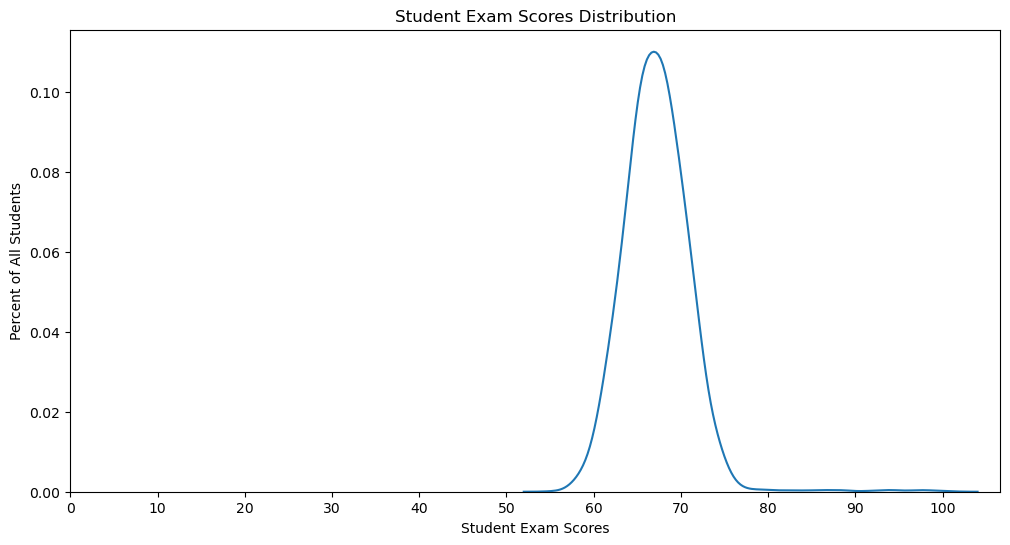

The average students's exam score found throughout the dataset is 67.24 percent.


In [104]:
# Plot the KDE for exam scores
plt.figure(figsize=(12, 6))
sns.kdeplot(data=factors, x="Exam Score", bw_adjust=1.5)

# Space x-axis out in intervals of 10
plt.xticks(range(0, 110, 10))

# Add title and labels
plt.title("Student Exam Scores Distribution")
plt.xlabel("Student Exam Scores")
plt.ylabel("Percent of All Students")

# Show the plot
plt.show()

# Calculate the average exam score
average_student_score = factors["Exam Score"].mean()

# Print the average exam score in a statement
print(f"The average students's exam score found throughout the dataset is {average_student_score:.2f} percent.")


### Attendance and Exam Scores
The relationship between student attendance and exam scores will now be examined and visualized using a bar graph. Attendance is split into four groups, those who attended between 60 to 70 classes, 71 to 80 classes, 81 to 90 classes, and 91 to 100 percent of their classes.

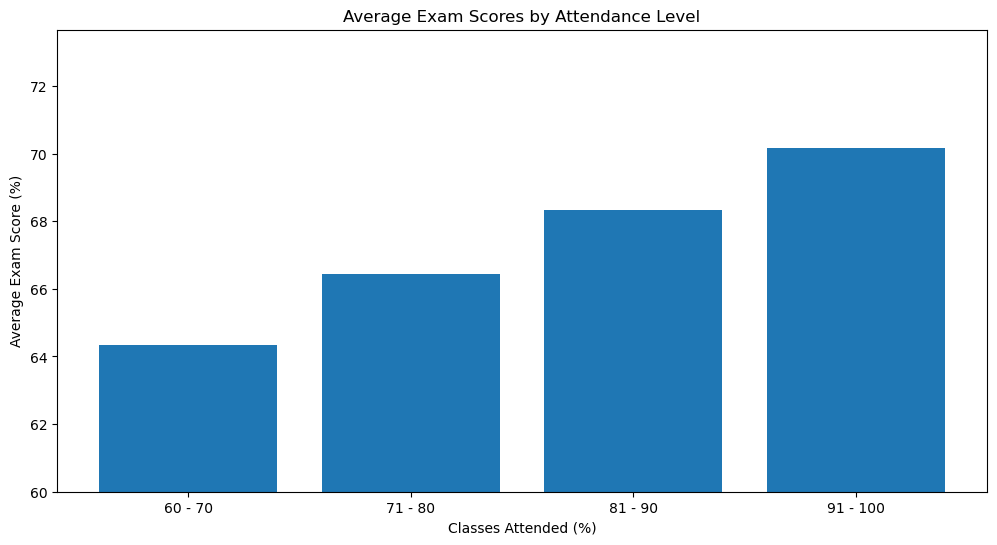

Average Exam Scores by Attendance Level:

Percentage of Classes Attended		Exam Score

	   60 - 70			   64.33
	   71 - 80			   66.43
	   t81 - 90			   68.34
	   91 - 100			   70.16


In [105]:
# Split attendance into four groups
lower_quarter = factors[factors["Attendance"] <= 70]
lower_mid_quarter = factors[(factors["Attendance"] >= 71) & (factors["Attendance"] <= 80)]
upper_mid_quarter = factors[(factors["Attendance"] >= 81) & (factors["Attendance"] <= 90)]
upper_quarter = factors[factors["Attendance"] > 90]

# Find the average student exam score for each group
lower_average = lower_quarter["Exam Score"].mean()
lower_mid_average = lower_mid_quarter["Exam Score"].mean()
upper_mid_average = upper_mid_quarter["Exam Score"].mean()
upper_average = upper_quarter["Exam Score"].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(["60 - 70", "71 - 80", "81 - 90", "91 - 100"], [lower_average, lower_mid_average, upper_mid_average, upper_average])
plt.title("Average Exam Scores by Attendance Level")
plt.ylabel("Average Exam Score (%)")
plt.xlabel("Classes Attended (%)")
plt.ylim(60, None)
plt.show()

# Print out the average scores by attendance
print("Average Exam Scores by Attendance Level:")
print()
print("Percentage of Classes Attended\t\tExam Score")
print()
print(f"\t   60 - 70\t\t\t   {lower_average:.2f}")
print(f"\t   71 - 80\t\t\t   {lower_mid_average:.2f}")
print(f"\t   t81 - 90\t\t\t   {upper_mid_average:.2f}")
print(f"\t   91 - 100\t\t\t   {upper_average:.2f}")

### Hours Studied and Exam Scores
Now, the relationship between a students's hours spent studying and their exam score will be analyzed. For this portion, a graph will be plotted. Hours spent studying will be split into four groups, 0 to 11 hours, 12 to 22 hours, 23 to 33, and 33 to 44 hours spent studying. 

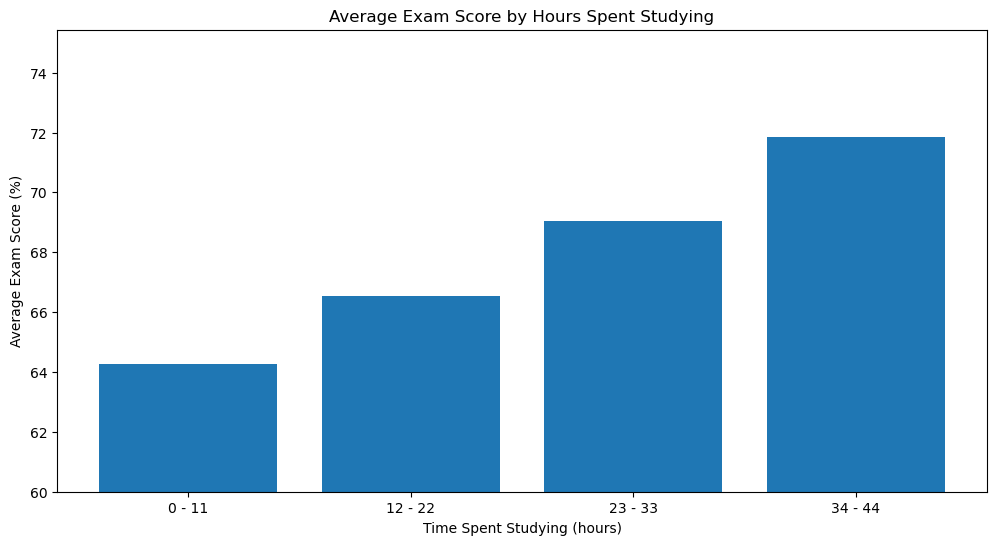

Average Exam Scores by Hours Spent Studying:

Hours Spent Studying	Exam Score

        0 - 11		   64.26
       12 - 22		   66.53
       23 - 33		   69.05
       34 - 44		   71.84


In [106]:
# Split hours studied into four groups
lower_quarter = factors[factors["Hours Studied"] <= 11]
lower_mid_quarter = factors[(factors["Hours Studied"] >= 12) & (factors["Hours Studied"] <= 22)]
upper_mid_quarter = factors[(factors["Hours Studied"] >= 23) & (factors["Hours Studied"] <= 33)]
upper_quarter = factors[factors["Hours Studied"] > 33]

# Find the average student exam score for each group
lower_average = lower_quarter["Exam Score"].mean()
lower_mid_average = lower_mid_quarter["Exam Score"].mean()
upper_mid_average = upper_mid_quarter["Exam Score"].mean()
upper_average = upper_quarter["Exam Score"].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(["0 - 11", "12 - 22", "23 - 33", "34 - 44"], [lower_average, lower_mid_average, upper_mid_average, upper_average])
plt.title("Average Exam Score by Hours Spent Studying")
plt.ylabel("Average Exam Score (%)")
plt.xlabel("Time Spent Studying (hours)")
plt.ylim(60, None)
plt.show()

# Print out the average scores by Hours Spent Studying
print("Average Exam Scores by Hours Spent Studying:")
print()
print("Hours Spent Studying\tExam Score")
print()
print(f"        0 - 11\t\t   {lower_average:.2f}")
print(f"       12 - 22\t\t   {lower_mid_average:.2f}")
print(f"       23 - 33\t\t   {upper_mid_average:.2f}")
print(f"       34 - 44\t\t   {upper_average:.2f}")

### Extracurricular Activites and Exam Scores
In this section of the assignment, we will compare average exam scores of students who participated in extracurricular activities to those who did not with the use of a bar graph.

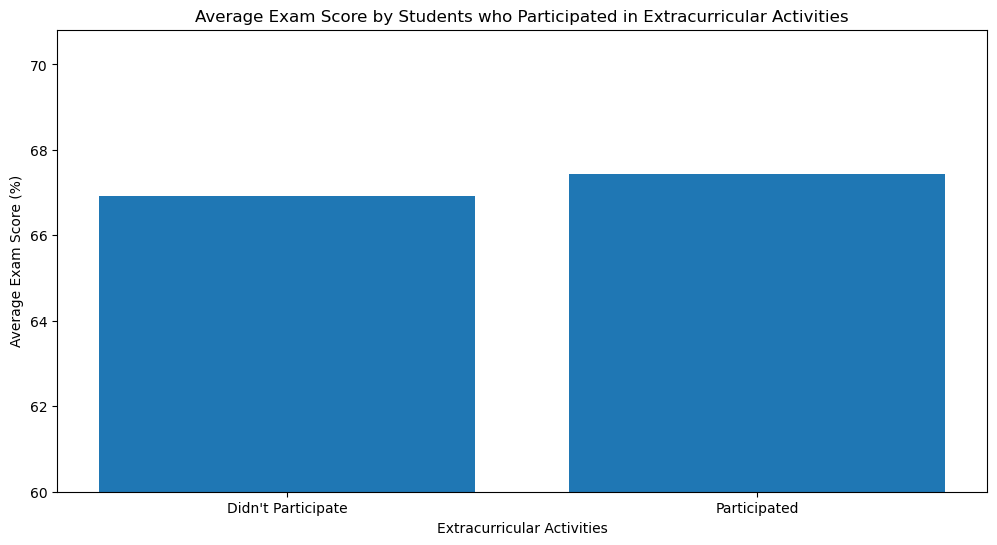

Average Exam Scores by Students who Participated in Extracurricular Activities:

Extracurricular Activities	Exam Scores

    Didn't Participate		   66.93
       Participated		   67.44


In [107]:
# Split the dataset into groups of students who either participated in extracurricular activites or didn't
extracurricular = factors[factors["Extracurricular Activities"] == "Yes"]
no_extracurricular = factors[factors["Extracurricular Activities"] == "No"]


# Find the average student exam score for each group
extracurricular_average = extracurricular["Exam Score"].mean()
no_extracurricular_average = no_extracurricular["Exam Score"].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(["Didn't Participate", "Participated"], [no_extracurricular_average, extracurricular_average])
plt.title("Average Exam Score by Students who Participated in Extracurricular Activities")
plt.ylabel("Average Exam Score (%)")
plt.xlabel("Extracurricular Activities")
plt.ylim(60, None)
plt.show()

# Print out the average scores by Hours Spent Studying
print("Average Exam Scores by Students who Participated in Extracurricular Activities:")
print()
print("Extracurricular Activities\tExam Scores")
print()
print(f"    Didn't Participate\t\t   {no_extracurricular_average:.2f}")
print(f"       Participated\t\t   {extracurricular_average:.2f}")

### Average Sleep per Night and Exam Scores
This portion of the assignment will analyze the relationship between students's average exam scores and the average amount of sleep they get. The dataset has students's average hours of sleep per night range from 4 to 10 hours. Consequently, average hours of sleep will be split into two groups, 4 to 6  hours of sleep and 7 to 10 hours of sleep.

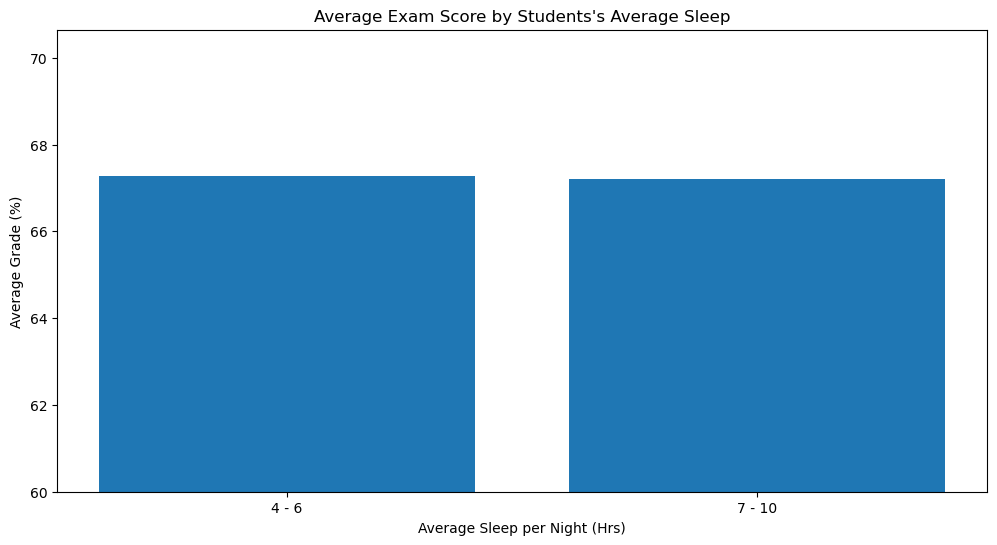

Average Exam Scores by Students Average Sleep:

Students Average Hours of Sleep		Exam Scores

	    4 - 6			   67.28
	    7 - 10			   67.21


In [108]:
# Split the dataset into groups of students with less and more sleep
less_sleep = factors[(factors["Sleep Hours"] >= 4) & (factors["Sleep Hours"] <= 6)]
more_sleep = factors[(factors["Sleep Hours"] >= 7) & (factors["Sleep Hours"] <= 10)]


# Find the average student exam score for each group
less_sleep_average = less_sleep["Exam Score"].mean()
more_sleep_average = more_sleep["Exam Score"].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(["4 - 6", "7 - 10"], [less_sleep_average, more_sleep_average])
plt.title("Average Exam Score by Students's Average Sleep")
plt.ylabel("Average Grade (%)")
plt.xlabel("Average Sleep per Night (Hrs)")
plt.ylim(60, None)
plt.show()

# Print out the average scores by Hours Spent Studying
print("Average Exam Scores by Students Average Sleep:")
print()
print("Students Average Hours of Sleep\t\tExam Scores")
print()
print(f"\t    4 - 6\t\t\t   {less_sleep_average:.2f}")
print(f"\t    7 - 10\t\t\t   {more_sleep_average:.2f}")

### Motivation Levels and Exam Scores
For this final part of the analysis section, students will be categorized into groups based on similar motivation levels levels and the average exam scores of each group will be compared.

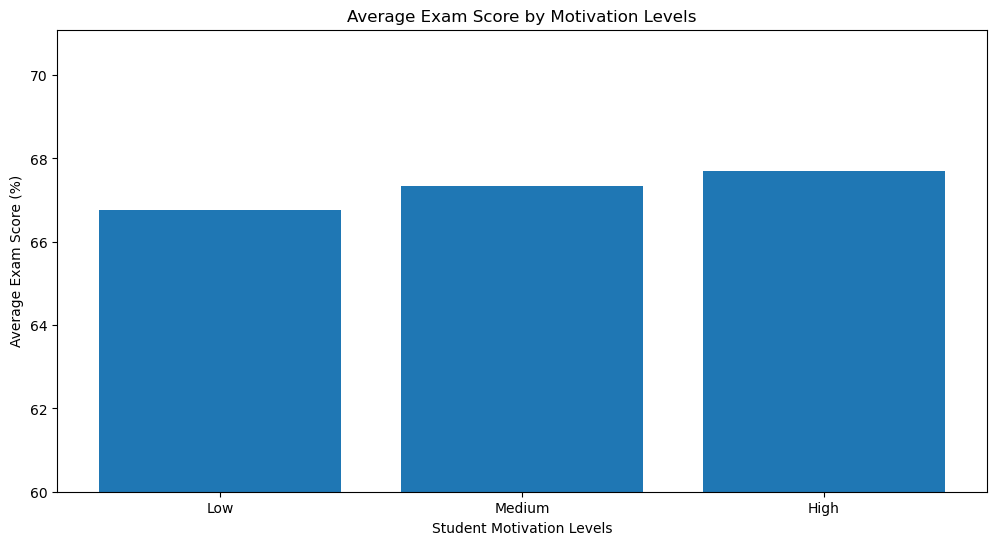

Average Exam Scores by Motivation Levels:

Motivation Level	Exam Scores

      Low		   66.75
     Medium		   67.33
      High		   67.70


In [109]:
# Split the dataset into groups of students will low, medium, and high motivation levels
low = factors[factors["Motivation Level"] == "Low"]
medium = factors[factors["Motivation Level"] == "Medium"]
high = factors[factors["Motivation Level"] == "High"]


# Find the average student exam score for each group
low_average = low["Exam Score"].mean()
medium_average = medium["Exam Score"].mean()
high_average = high["Exam Score"].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(["Low", "Medium", "High"], [low_average, medium_average, high_average])
plt.title("Average Exam Score by Motivation Levels")
plt.ylabel("Average Exam Score (%)")
plt.xlabel("Student Motivation Levels")
plt.ylim(60, None)
plt.show()

# Print out the average scores by Hours Spent Studying
print("Average Exam Scores by Motivation Levels:")
print()
print("Motivation Level\tExam Scores")
print()
print(f"      Low\t\t   {low_average:.2f}")
print(f"     Medium\t\t   {medium_average:.2f}")
print(f"      High\t\t   {high_average:.2f}")

## Discussion
In this assignment, I explored how students's internal factors can affect their exam scores. Internal factors included motivation levels, average hours of sleep per night, average hours spent studying per week, students decisions to participate in extracurricular activities, and students's attendance. 

Students's attendance levels and hours spent studying had the biggest positive effects on exam scores. The average exam score of students who only attended 60% to 70% of their classes was 5.83% lower than the average exam score of those students who attended 91% to 100% of their classes. The average exam score of students who only spent zero to eleven hours studying was 7.58% lower than the average exam score of students who spent 34 to 44 hours studying per week. The data in these groups of factors show that there are factors that exist that, when worked upon, can increase the exam scores of a student.

Other internal factors, such as motivation levels and participating in extracurricular activities also have positive effects on students's exam scores, but they are smaller. The average exam score of students who had low motivation levels was only 0.95% lower than the average score of students who had high motivation levels. Additionally, the average exam score of students who participated in extracurricular activities was only 0.51% lower than the average exam score of students who did not participate in extracurricular activities. Although exam scores are only minorly improved in these categories, the data still shows that there are factors in your life when it comes to studying that you can change to have even some sort of better success when it comes to exam scores. 

The final internal factor investigated throughout the course of this assignment was the average amount of hours spent sleeping per night. Interestingly, this internal factor proved to have a negative effect on students's grades, albeit minor. For this internal factor, the average exam score for students with, on average, four to six hours of sleep was 0.07% higher than the average exam score of students who, on average, had seven to ten hours of sleep. Although there is some sort of score difference between the two groups, the difference is very minuscule. This makes it very possible that this data can be dismissed, as there could have been other external factors between the two groups that could have made up for this difference in exam scoring. 

## Conclusion
Throughout the course of this assignment, various courses of action were taken so that data could be analyzed and used to form an argument. The assignment first involved loading data that pertained to student performance factors, in the form of a CSV, into a variable using the pandas library, then cleaning that data of external factors so that the remaining data was of only internal factors that pertained to student performances. Relationships were then made into a visibly congruent manner through the use of many graphs using the seaborn and matplotlib.pyplot libraries. Relationships were then clearly drawn under the discussions portion of the assignment. The data analyzed throughout this assignment concluded that there is some form of positive relationship between the studied internal factors and student performance. Specifically, student performance was affected the greatest by the internal factors that were students's attendance and hours spent studying. Minor positive relationships were also found through the internal factors that were motivation levels and students's participation in extracurricular activities. Though there was a negative relationship found between a student's average hours spent sleeping per night and exam scores, the difference was very minuscule. The negative relationship is more likely due to other internal factors affecting the data and not the actual result of a variance in hours of sleep. More reasonably, the relationship between a student's hours of sleep and exam performance is non-existent. The data found throughout this assignment leads to a conclusion that if you are a student, there are factors in your control that affect your exam performance. 

## References
OUAC, Educational image - https://www.ouac.on.ca/guide/teas-guide/

Data source, Kaggle - (https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download)

Pandas for data manipulation - https://pandas.pydata.org/

Seaborn for data visualization - https://seaborn.pydata.org/

Matplotlib.pyplot for data visualization - https://matplotlib.org/